In [3]:
import time 
import os 
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow as tf 

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


In [4]:
# versions 
print(tf.__version__)
print(tf.keras.__version__)

2.2.0
2.3.0-tf


In [5]:
CheckList = ["GPU", "CPU"]
for device in CheckList:
    out_ = tf.config.list_physical_devices(device)    
    if len(out_) > 0:
        print(f"{device} is available")        
        print("details\n",out_)
    else:
        print(f"{device} not available")

GPU not available
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [23]:
# load mnist dataset 
mnist = tf.keras.datasets.mnist
( x_train_full , y_train_full ), (x_test , y_test)  = mnist.load_data()  

## visualise the data 

In [11]:
x_train_full[1] # see the data 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

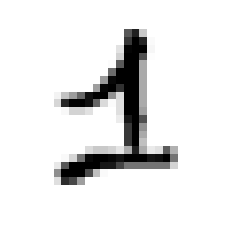

actual value =  1


In [15]:
plt.imshow(x_train_full[24] , cmap ='binary')
plt.axis('off')
plt.show()
print('actual value = ', y_train_full[24])

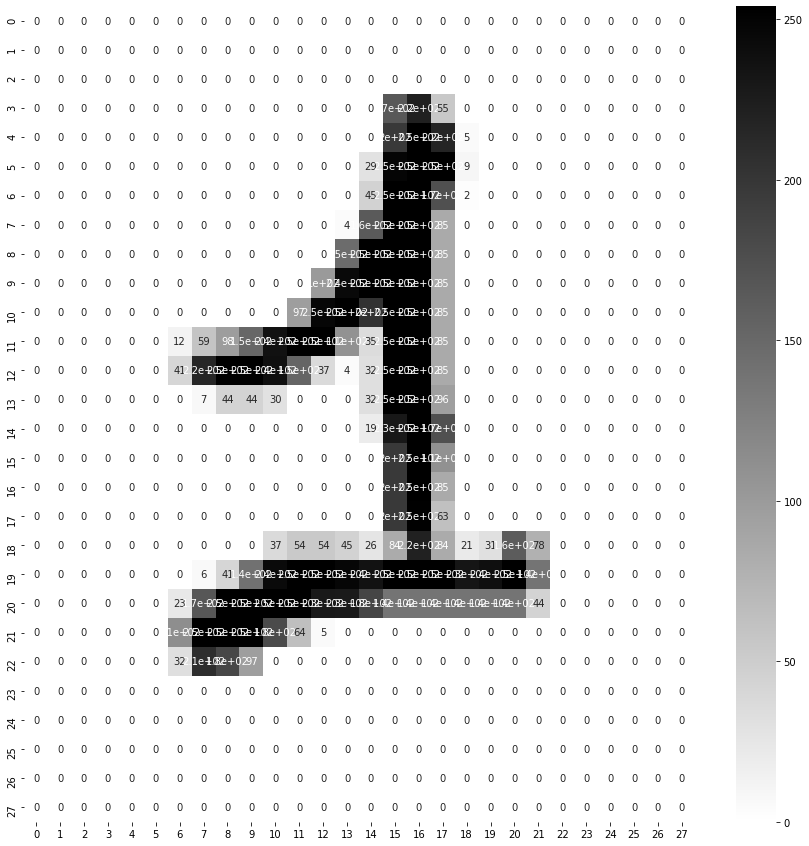

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train_full[24] , annot =True , cmap ='binary')
plt.show()

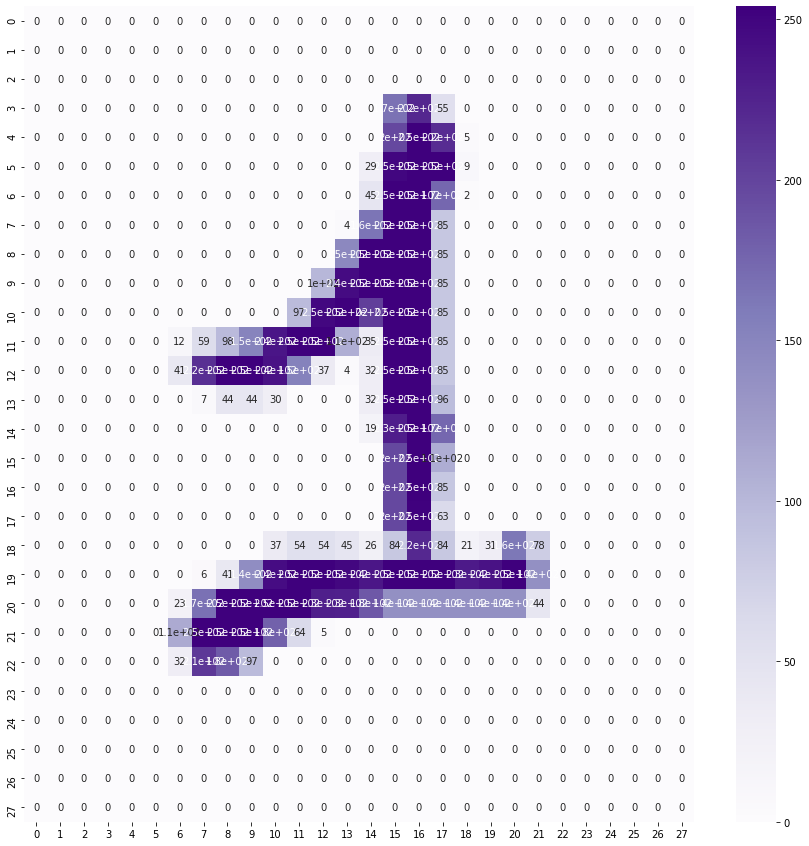

In [38]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train_full[24] , annot =True , cmap ='Purples')
plt.show()

## dataset shapes 
- here 
     - 60000 number of records in train dataset
     - (28 ,28) matrix --> pix of the image 

In [26]:
# dataset shapes 

print(f"data type of X_train_full: {x_train_full.dtype},\nshape of X_train_full: {x_train_full.shape}")
print(f"\n data type of y_train_full: {y_train_full.dtype},\nshape of y_train_full: {y_train_full.shape}")
print(f"\n data type of x_test: {x_test.dtype},\nshape of x_test: {x_test.shape}")
print(f"\n data type of y_test: {y_test.dtype},\nshape of y_test: {y_test.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)

 data type of y_train_full: uint8,
shape of y_train_full: (60000,)

 data type of x_test: uint8,
shape of x_test: (10000, 28, 28)

 data type of y_test: uint8,
shape of y_test: (10000,)


## create the validation dataset
- **why validation dataset requires** 
    - validation dataset needed during model training 
    - **During training as model get taining (the result compares with the validation dataset continiously)**
    - you will get 4 performance **(train_loss , train_accuracy , val_loss , val_accuracy)**
    - if validation dataset un-avaiable then it'll gives only two perfomance matrix 

In [35]:
# here we are creating two dataset(train dataset and validation dataset) from x_train_full ; 

# first 6000 dataset used as validation dataset 
# [start : stop : step ]
# dividing by 255 to scalling down the dataset 

x_validation , x_train = x_train_full[ : 6000] /255 , x_train_full[ 6000 : ] /255
y_validation  = y_train_full[ : 6000]
y_train = y_train_full[ 6000 : ] 

x_test =  x_test/255

In [34]:
# shapes of the dataset 
print(f"data type of x_validation: {x_validation.dtype},\nshape of X_train_full: {x_validation.shape}")
print(f"\n data type of y_validation: {y_validation.dtype},\nshape of y_train_full: {y_validation.shape}")
print(f"\n data type of x_train: {x_train.dtype},\nshape of x_train: {x_train.shape}")
print(f"\n data type of y_train: {y_train.dtype},\nshape of y_test: {y_train.shape}")

data type of x_validation: float64,
shape of X_train_full: (6000, 28, 28)

 data type of y_validation: uint8,
shape of y_train_full: (6000,)

 data type of x_train: float64,
shape of x_train: (54000, 28, 28)

 data type of y_train: uint8,
shape of y_test: (54000,)


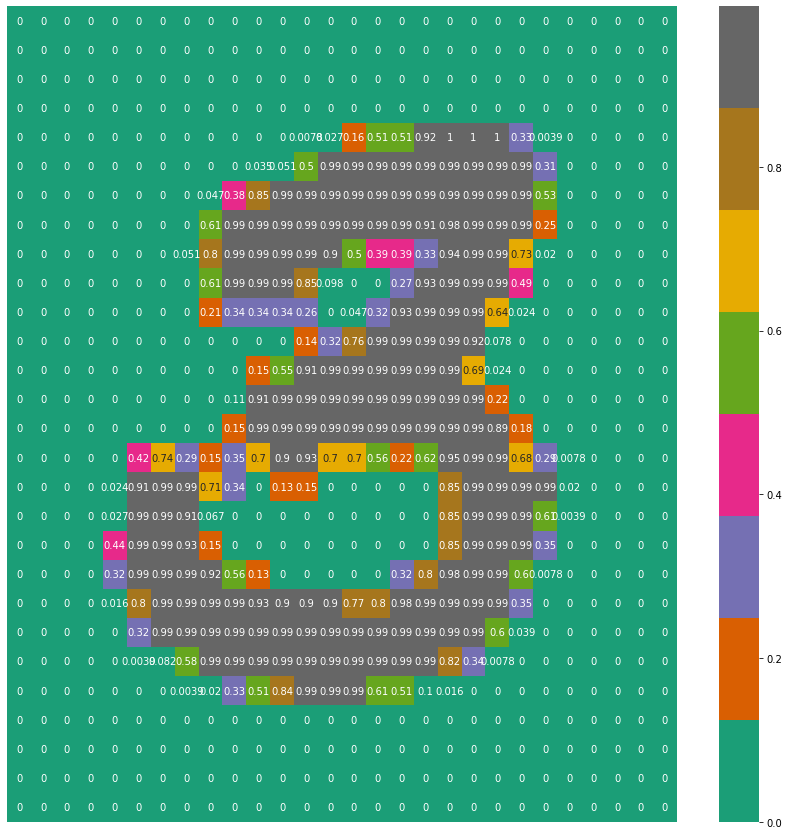

actual_value = 3


In [42]:
# lets view the first data point of X_train
# after scalling 
plt.figure(figsize=(15,15))
sns.heatmap(x_train[69], cmap= 'Dark2' , annot =True)
plt.axis('off')
plt.show()
print('actual_value =',y_train[69])

## Callbackfunctions()

#### Tensorboard call back 
     - it'll plot all the performnace of the model it self'
     -  it'll record all the prerformance 
     - look at the end of this file 


In [ ]:
os.getcwd()

In [72]:

def get_log_path( dirs_path = 'logs/fit'):
    fileName  = time.strftime('log_%Y_%m_%d_%H_%M_%S')
    print(fileName)
    log_path = os.path.join(dirs_path  , fileName)
    print(f'log saved at :{log_path}')
    return log_path

log_path = get_log_path()

# the log file will be saved at location log_path 

tb_cb = tf.keras.callbacks.TensorBoard(log_dir = log_path)

log_2021_05_23_10_47_05
log saved at :log/fit\log_2021_05_23_10_47_05


## model structure creation 

In [86]:
# input --> hidden1 --> hiddden2 -->op

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [28,28]  , name = 'input_layer'))
model.add(tf.keras.layers.Dense(300 , activation = 'relu' , name = 'first_hidden_layer'))
model.add(tf.keras.layers.Dense(100 , activation = 'relu' , name = 'second_hidden_layer'))
model.add(tf.keras.layers.Dense(10 , activation = 'softmax' , name = 'Output_layer'))


# we need optimisers , loss functions , metrics 
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]
 
model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)

# epochs , validation set ,batch size 

EPOCHS = 30
VALIDATION_SET = (x_validation, y_validation)
 
history = model.fit( x_train, y_train, 
                            epochs=EPOCHS ,
                            validation_data=VALIDATION_SET , 
                            batch_size  = 32  , 
                            callbacks = [tb_cb]
                        )


Epoch 1/30
1688/1688 [==============================] - 15s 9ms/step - loss: 0.5946 - accuracy: 0.8490 - val_loss: 0.3059 - val_accuracy: 0.9157
Epoch 2/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2889 - accuracy: 0.9168 - val_loss: 0.2400 - val_accuracy: 0.9343
Epoch 3/30
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2373 - accuracy: 0.9326 - val_loss: 0.2048 - val_accuracy: 0.9427
Epoch 4/30
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2028 - accuracy: 0.9415 - val_loss: 0.1819 - val_accuracy: 0.9497
Epoch 5/30
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1772 - accuracy: 0.9493 - val_loss: 0.1638 - val_accuracy: 0.9548
Epoch 6/30
1688/1688 [==============================] - 16s 10ms/step - loss: 0.1570 - accuracy: 0.9556 - val_loss: 0.1469 - val_accuracy: 0.9592
Epoch 7/30
1688/1688 [==============================] - 20s 12ms/step - loss: 0.1410 - accuracy: 0.9598 - val_loss: 0.1343 - val_

## saving the  model 

In [83]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Mnist_Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [87]:
# saving the model 

unique_path = model.save( saveModel_path() )

your model will be saved at the following location
SAVED_MODELS\Mnist_Model_2021_05_23_11_06_41_.h5


## load model and predict 

In [93]:
os.listdir('./SAVED_MODELS/')


['Mnist_Model_2021_05_23_11_06_41_.h5']

In [98]:
dir_path  = './SAVED_MODELS/' 
model_name  = 'Mnist_Model_2021_05_23_11_06_41_.h5'
model_path = os.path.join(dir_path , model_name)
print(model_path)

./SAVED_MODELS/Mnist_Model_2021_05_23_11_06_41_.h5


In [100]:
# loading the model 
model =  tf.keras.models.load_model(filepath = model_path )

#### prediction 

In [105]:
y_proba =  model.predict(x = x_train[:3])
y_proba
# you will get probabilistic values 

array([[2.1173719e-06, 2.2941906e-07, 1.7807994e-05, 2.0533048e-07,
        2.9932391e-05, 1.3341349e-05, 9.9993551e-01, 1.0560806e-10,
        8.3188831e-07, 1.9905022e-08],
       [9.9999189e-01, 3.1091619e-11, 5.8158666e-06, 1.7432264e-08,
        8.3899077e-10, 1.1188160e-09, 9.2255121e-08, 2.0823559e-06,
        9.3473583e-11, 1.7388125e-07],
       [2.3677133e-08, 9.9165958e-01, 1.7534838e-05, 9.2241034e-04,
        2.2698597e-04, 4.4331928e-06, 7.7375745e-07, 1.2420210e-03,
        5.8409348e-03, 8.5388776e-05]], dtype=float32)

In [106]:
# round up the probabilistic values \
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   ,
        0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.992, 0.   , 0.001, 0.   , 0.   , 0.   , 0.001, 0.006,
        0.   ]], dtype=float32)

In [110]:
y_pred = np.argmax(y_proba , axis = -1)
print('y_pred = ' , y_pred)
print(f'Actual values are {y_train[:3]}')
# here the both values are matches 
# hence prediction is correct 

y_pred =  [6 0 1]
Actual values are [6 0 1]


## check the performance of the model on test dataset 

In [113]:
# evalutate the test data 
print (model.evaluate(x_test, y_test))
print('\n Test loss : ' ,model.evaluate(x_test, y_test)[0])
print('Test Accuracy : ' ,model.evaluate(x_test, y_test)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9770
[0.071846142411232, 0.9769999980926514]
313/313 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9770

 Test loss :  0.071846142411232
313/313 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9770
Test Accuracy :  0.9769999980926514


In [119]:
y_test_proba = model.predict(x_test[:3])
y_test_pred  = np.argmax(y_test_proba , axis = -1)

print('y_test_pred = ' , y_test_pred)
print(f'Actual values are {y_test[:3]}')


y_test_pred =  [7 2 1]
Actual values are [7 2 1]


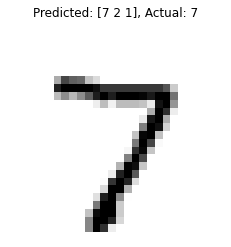

------------------------------------------------------------


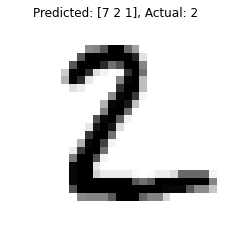

------------------------------------------------------------


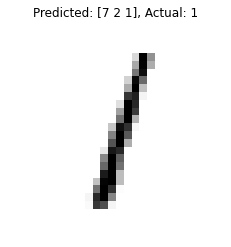

------------------------------------------------------------


In [121]:
for data, pred, actual in zip(x_test[:3], y_test_pred, y_test[:3]):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {y_test_pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

## Plotting the performance of the model 

In [122]:
pd.DataFrame(data = history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.594606,0.849037,0.305870,0.915667
1,0.288916,0.916759,0.240015,0.934333
2,0.237325,0.932593,0.204841,0.942667
3,0.202827,0.941481,0.181872,0.949667
4,0.177243,0.949296,0.163767,0.954833
5,0.156980,0.955648,0.146949,0.959167
6,0.140999,0.959796,0.134283,0.963667
7,0.127353,0.964056,0.126483,0.963167
8,0.115948,0.967352,0.117525,0.967000
9,0.105602,0.970148,0.113812,0.968000


<Figure size 1440x1440 with 0 Axes>

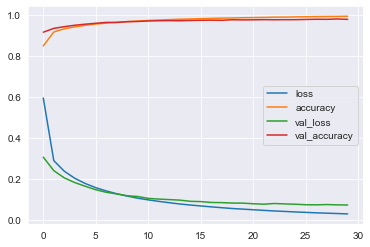

In [128]:
plt.figure(figsize=(20,20))
sns.set_style('darkgrid')
pd.DataFrame(data = history.history).plot()
plt.show()

## TensorBoard Callbak() , logs output visualization

In [129]:
os.getcwd()

'F:\\Deep_Learning_and_Object Detection\\ANN'

In [132]:
%load_ext tensorboard 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [143]:
%tensorboard --logdir log/fit

Reusing TensorBoard on port 6006 (pid 300), started 0:06:45 ago. (Use '!kill 300' to kill it.)

##  summary of the model 



In [111]:
model.summary()
# 28 *28 = 784 --> product of shape of image
# First_layer = (784 * 300) + 300<--bias  = 235500
# Second_layer = (300 * 100) + 100 <--bias = 30100
# Output_layer = (100 * 10) + 10 <--bias = 1010

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
first_hidden_layer (Dense)   (None, 300)               235500    
_________________________________________________________________
second_hidden_layer (Dense)  (None, 100)               30100     
_________________________________________________________________
Output_layer (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## get the layers name 

In [76]:
for i in model.layers:
    print(i.name)

input_layer
first_hidden_layer
second_hidden_layer
Output_layer


## get the weights of any layer

In [147]:
# first array is for weights 
# second array is for Biases 
model.layers[1].get_weights()

[array([[-0.04529503, -0.05229548, -0.01290383, ...,  0.03181845,
         -0.0646683 , -0.06741158],
        [-0.00361598,  0.04985903,  0.05000416, ..., -0.01526371,
          0.04589538,  0.0527385 ],
        [-0.06994344,  0.05049796,  0.00561421, ...,  0.06573571,
          0.06982502,  0.04715052],
        ...,
        [-0.01261018,  0.01293425,  0.04950412, ..., -0.0555582 ,
          0.03705277,  0.00174528],
        [-0.00232939, -0.02519224,  0.06681024, ...,  0.03714857,
         -0.01034298, -0.06499538],
        [-0.00348966,  0.02336035,  0.07407787, ..., -0.0244334 ,
         -0.05938497, -0.04552095]], dtype=float32),
 array([-6.36637490e-03,  1.07472716e-02,  2.23875735e-02,  6.60601854e-02,
         7.72396941e-03, -7.54972640e-03,  4.56339382e-02,  3.38593684e-02,
         8.03400129e-02, -6.32790243e-03,  3.20889102e-03,  5.87722398e-02,
        -3.09047811e-02,  1.27968900e-02,  1.21099269e-02,  7.92201143e-03,
        -2.68497411e-02,  2.60289423e-02,  4.32263464e

In [148]:
# weights of the first layer 
weights = model.layers[1].get_weights()[0]
biases = model.layers[1].get_weights()[1]


C:\ProgramData\Anaconda3\envs\tenserflow22andkeras\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


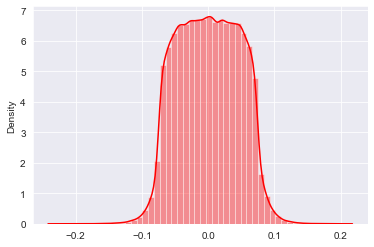

In [152]:
sns.distplot(weights , color = 'red')
plt.show()